In [8]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pickle

from modules import *

In [9]:
plt.rcParams['font.size'] = 13
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['font.family'] = 'Arial'

In [10]:
# load data
with open('data/data_simulation/data_budget.p', 'rb') as f:
    data = pickle.load(f)
print(data.keys())

n_depth = data['n_depth']
n_branch_set = data['n_branch_set']
rollout_depth_set = data['rollout_depth_set']
budget_set = data['budget_set']
n_world = data['n_world']
n_test = data['n_test']
sig_r = data['sig_r']
expected_rewards = data['expected_rewards']
max_rewards = data['max_rewards']
expected_accuracies = data['expected_accuracies']

dict_keys(['n_depth', 'n_branch_set', 'rollout_depth_set', 'budget_set', 'n_world', 'n_test', 'sig_r', 'expected_rewards', 'max_rewards', 'expected_accuracies'])


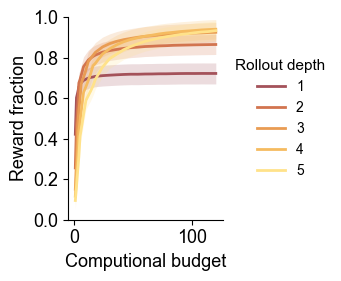

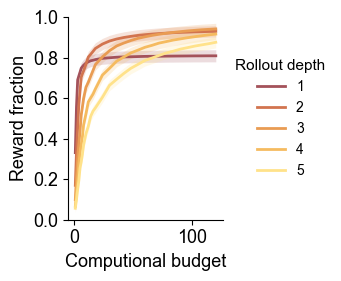

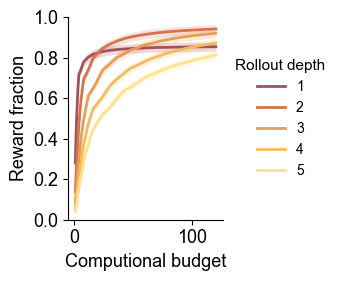

In [11]:
colors = ['#A4525A', '#D2744F', '#E99C53', '#F5BB60', '#FFE28A']

for i_branch, n_branch in enumerate(n_branch_set):
    plt.figure(figsize = (3.6, 3))

    for i_rollout_depth, rollout_depth in enumerate(rollout_depth_set):
        
        exrew = expected_rewards[i_branch, i_rollout_depth, :, :]
        m = np.mean(exrew, axis = 1)
        s = np.std(exrew, axis = 1) / np.sqrt(exrew.shape[1])
        norm = np.mean(max_rewards[i_branch, :])
        m /= norm
        s /= norm
        
        plt.plot(budget_set, m, color = colors[i_rollout_depth], label = rollout_depth, lw = 2)
        plt.fill_between(budget_set, m - s, m + s, alpha = 0.2, color = colors[i_rollout_depth], linewidth = 0)
        plt.ylim((0, 1))
        plt.xlabel('Computional budget')
        plt.ylabel('Reward fraction')

    plt.legend(bbox_to_anchor = (1, 0.5), loc = 'center left', fontsize = 10, frameon = False, title = 'Rollout depth', title_fontsize = '11')
    plt.tight_layout()
    # plt.show()
    plt.savefig(f'figures/figures_budget/p_reward_{n_branch}.pdf', bbox_inches = 'tight')

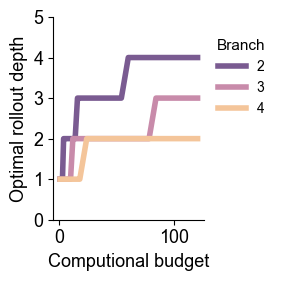

In [12]:
plt.figure(figsize = (3, 3))
colors = ['#7A5B91', '#C88BAA', '#F4C59A']

for i_branch, n_branch in enumerate(n_branch_set):
    exrew = expected_rewards[i_branch, ...]
    m = np.mean(exrew, axis = 2)
    optimal_depths = np.array(rollout_depth_set)[np.argmax(m, axis = 0)]

    plt.plot(budget_set, optimal_depths, color = colors[i_branch], lw = 4)
    plt.xlabel('Computional budget')
    plt.ylabel('Optimal rollout depth')
    plt.ylim(0, 5)

plt.tight_layout()
plt.legend(n_branch_set, bbox_to_anchor = (1, 0.7), loc = 'center left', fontsize = 10, frameon = False, title = 'Branch', title_fontsize = '11')
plt.tight_layout()
# plt.show()
plt.savefig(f'figures/figures_budget/p_rollout_depth_reward.pdf', bbox_inches = 'tight')

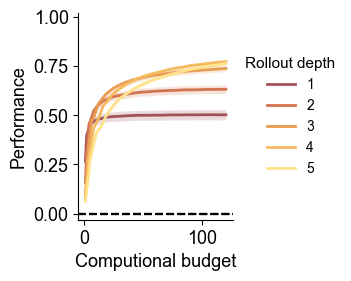

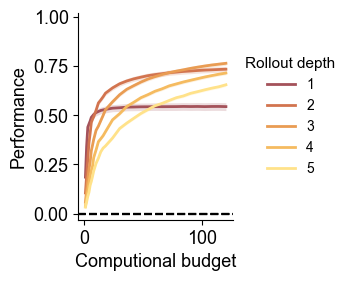

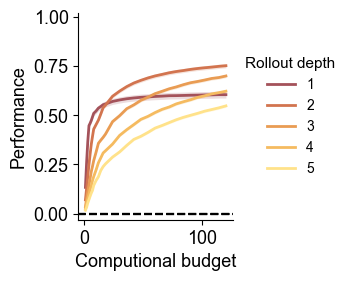

In [13]:
colors = ['#A4525A', '#D2744F', '#E99C53', '#F5BB60', '#FFE28A']

for i_branch, n_branch in enumerate(n_branch_set):
    plt.figure(figsize = (3.6, 3))

    for i_rollout_depth, rollout_depth in enumerate(rollout_depth_set):
        
        chance_acc = 1 / n_branch
        exacc = (expected_accuracies[i_branch, i_rollout_depth, :, :] - chance_acc) / (1 - chance_acc)
        m = np.mean(exacc, axis = 1)
        s = np.std(exacc, axis = 1) / np.sqrt(exacc.shape[1])
        
        plt.plot(budget_set, m, color = colors[i_rollout_depth], label = rollout_depth, lw = 2)
        plt.fill_between(budget_set, m - s, m + s, alpha = 0.2, color = colors[i_rollout_depth], linewidth = 0)
        plt.axhline(y = 0, linestyle = '--', color = 'k', alpha = 0.8)
        plt.ylim((-0.03, 1.02))
        plt.xlabel('Computional budget')
        plt.ylabel('Performance')

    plt.legend(bbox_to_anchor = (1, 0.5), loc = 'center left', fontsize = 10, frameon = False, title = 'Rollout depth', title_fontsize = '11')
    plt.tight_layout()
    # plt.show()
    plt.savefig(f'figures/figures_budget/p_accuracy_{n_branch}.pdf', bbox_inches = 'tight')

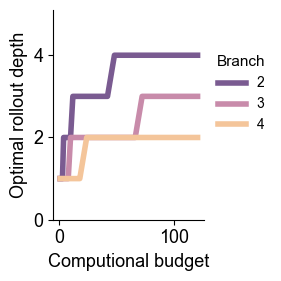

In [14]:
plt.figure(figsize = (3, 3))
colors = ['#7A5B91', '#C88BAA', '#F4C59A']

for i_branch, n_branch in enumerate(n_branch_set):

    chance_acc = 1 / n_branch
    exacc = (expected_accuracies[i_branch, :, :, :] - chance_acc) / (1 - chance_acc)
    
    m = np.mean(exacc, axis = 2)
    optimal_depths = np.array(rollout_depth_set)[np.argmax(m, axis = 0)]

    plt.plot(budget_set, optimal_depths, color = colors[i_branch], lw = 4)
    plt.xlabel('Computional budget')
    plt.ylabel('Optimal rollout depth')
    plt.ylim(0, 5.1)

plt.tight_layout()
plt.legend(n_branch_set, bbox_to_anchor = (1, 0.6), loc = 'center left', fontsize = 10, frameon = False, title = 'Branch', title_fontsize = '11')
plt.tight_layout()
# plt.show()
plt.savefig(f'figures/figures_budget/p_rollout_depth_accuracy.pdf', bbox_inches = 'tight')